In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r'C:\Users\madhu\LocalDesktop\Desktop\Madhu\jupyternotebook\zepto\zepto_v2.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


<Axes: xlabel='Category'>

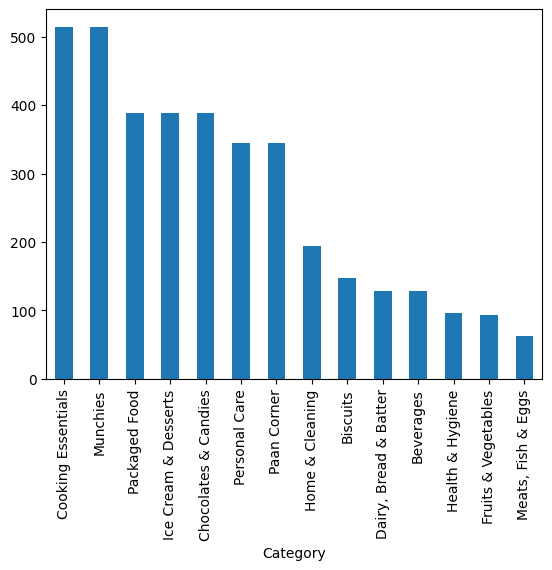

In [9]:
df['Category'].value_counts().head(15).plot(kind='bar')

(array([1147.,  501.,  679.,  324.,  205.,  275.,  463.,   13.,   45.,
          14.,   33.,    7.,   13.,    5.,    3.,    0.,    3.,    0.,
           0.,    2.]),
 array([   0.,   75.,  150.,  225.,  300.,  375.,  450.,  525.,  600.,
         675.,  750.,  825.,  900.,  975., 1050., 1125., 1200., 1275.,
        1350., 1425., 1500.]),
 <BarContainer object of 20 artists>)

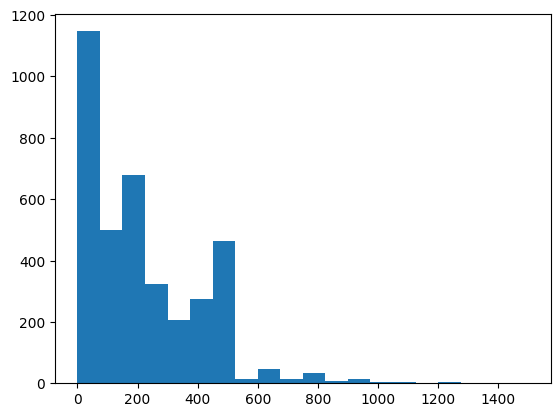

In [10]:
plt.hist(df['quantity'],bins=20)

In [11]:
cat_col=['Category','name','outOfStock']

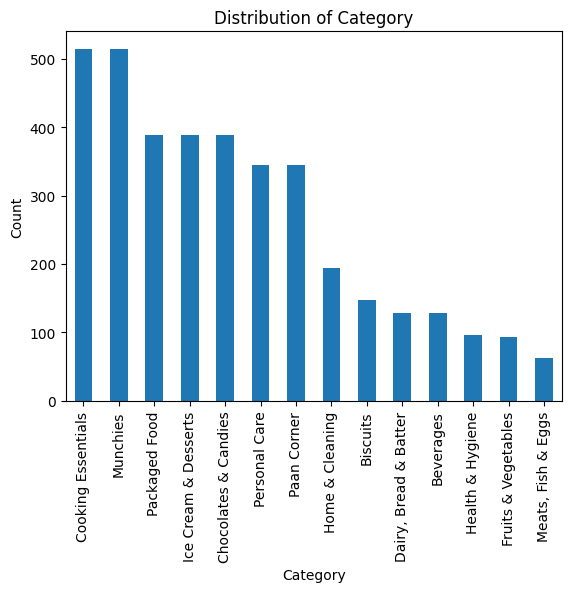

C:\Users\madhu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\madhu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


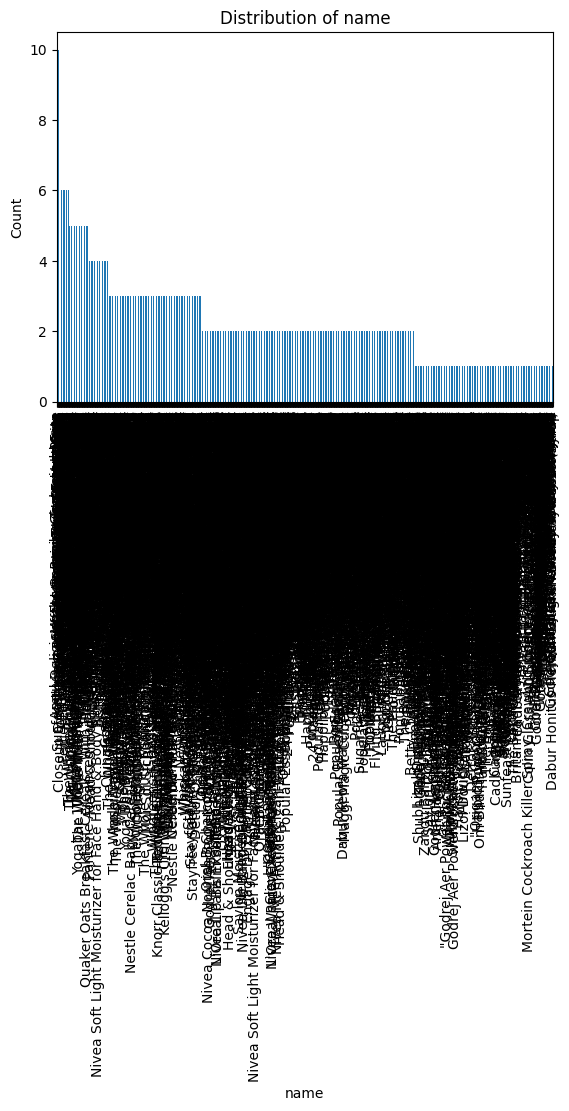

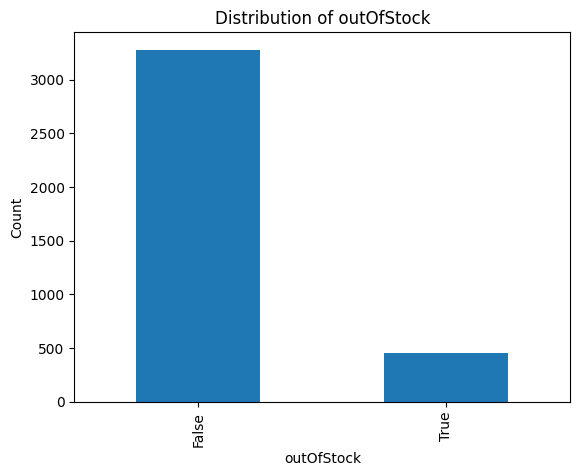

In [16]:
for col in df.columns:
    if col in cat_col:
        cat_data=df[col]

        if cat_data.dtype == 'bool' or cat_data.dtype == 'object':
            cat_data.value_counts().plot(kind='bar')
        
        plt.xlabel(f'{col}')
        plt.ylabel('Count')
        plt.title(f'Distribution of {col}')
        plt.show()

From this we can identify that cooking essentials and 

munchies are higher in number

also outofstock is higher and needs to be managed on inventory

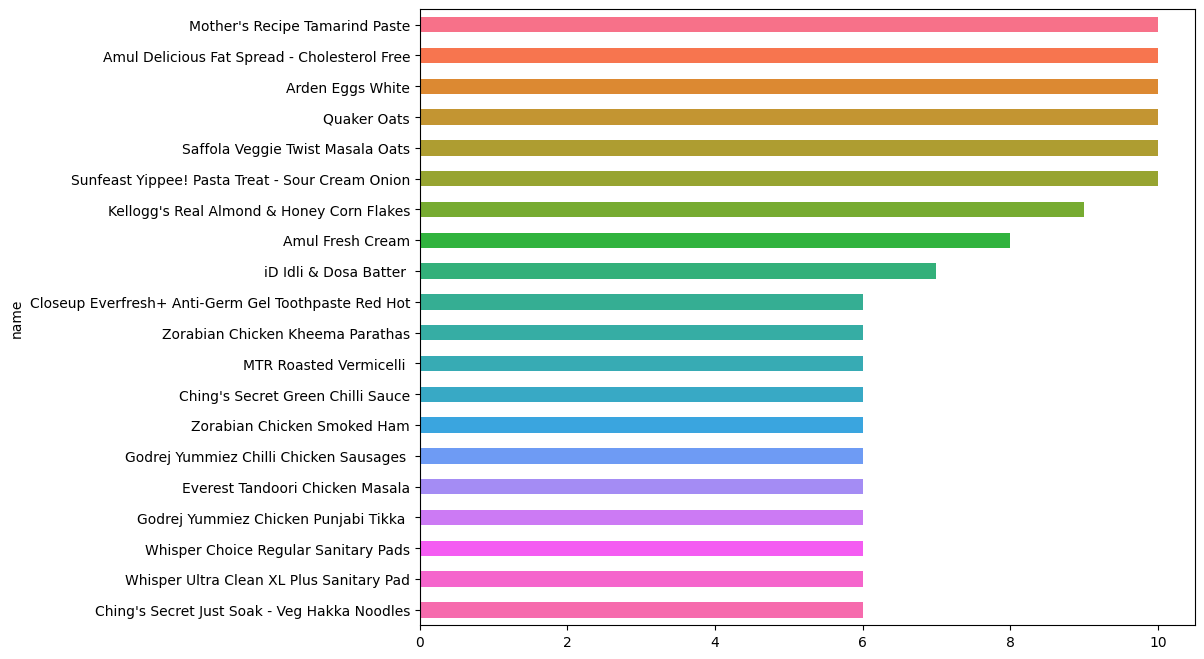

In [19]:
top_n=df['name'].value_counts().head(20)
colors=sns.color_palette('husl',20)
top_n.plot(kind='barh',figsize=(10,8),color=colors)
plt.gca().invert_yaxis()

few items dominate the chart by appearing very frequently in dataset

possible reasons:

popular items(real trend)

or data duplication or collection error(noise)

In [21]:
num_col=[col for col in df.columns if col not in cat_col]
num_col

['mrp',
 'discountPercent',
 'availableQuantity',
 'discountedSellingPrice',
 'weightInGms',
 'quantity']

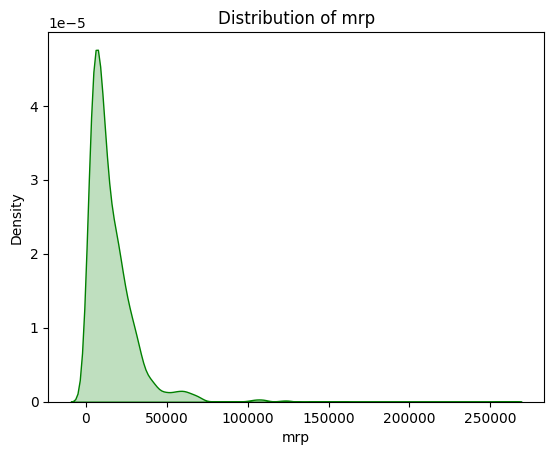

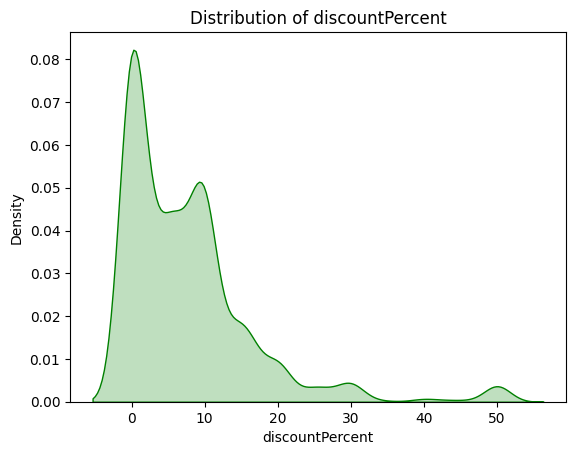

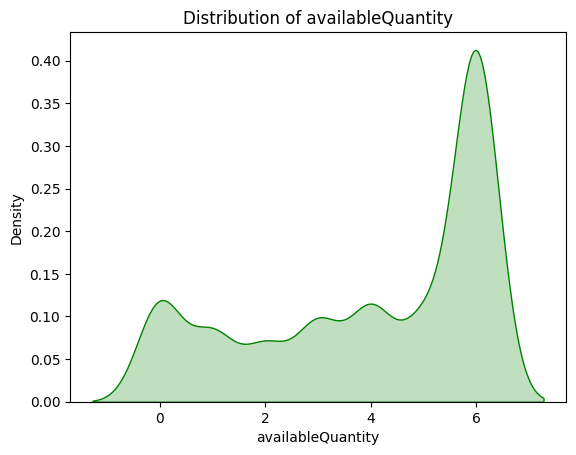

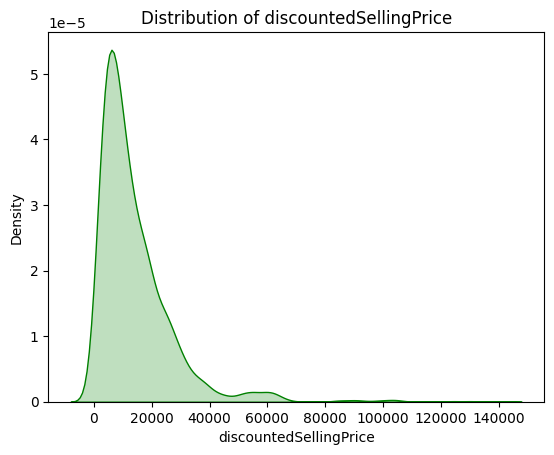

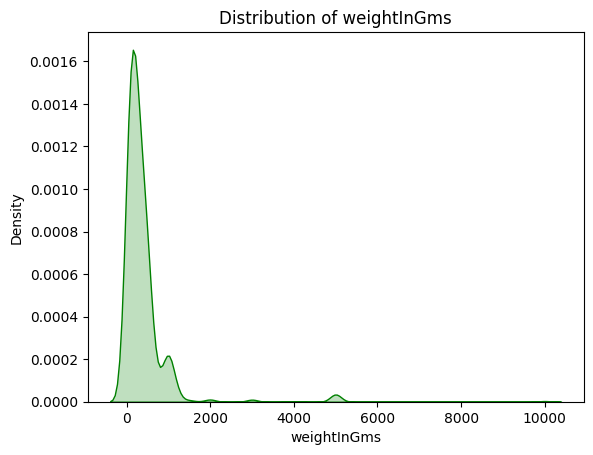

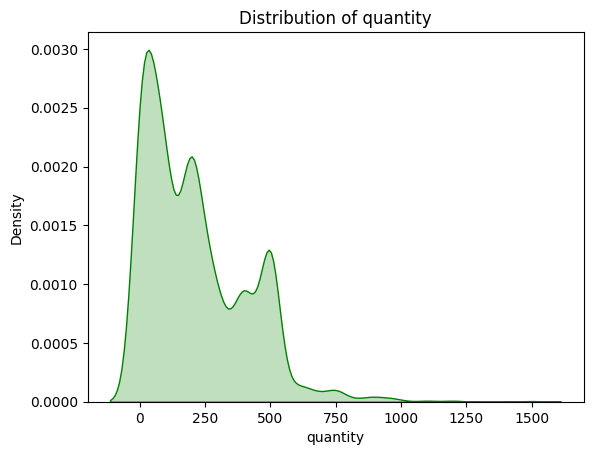

In [24]:
for col in num_col:
    sns.kdeplot(df[col],fill=True,color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

this helps us in treating the data for any predictive or classification modelling to be done on data

mrp has right skewed distribution

discountPercent has right skewed distribution

available quantity has left skewed distribution (with a few bumps)

discountedSellingPrice has sort of right skewness in it

weighInGms has right skewness

quantity has right skewness

models assume features are normally distributed. But skewness affects the prediction.

This analysis helps feature selection and wht to do to normalize this dataset 
ready for modelling.

if high skew --> bin the columnn like low/high/average
if long tail values --> normalize(for neural network), standardize(for svm,knn)

skewness helps identify outliers. can apply IQR method or z-score to treat before modelling.

Tree-based models(decision tree,random forest,xgboost) less sensitive to skew

logistic reg,linear reg, svm can suffer if skewed data is fed.

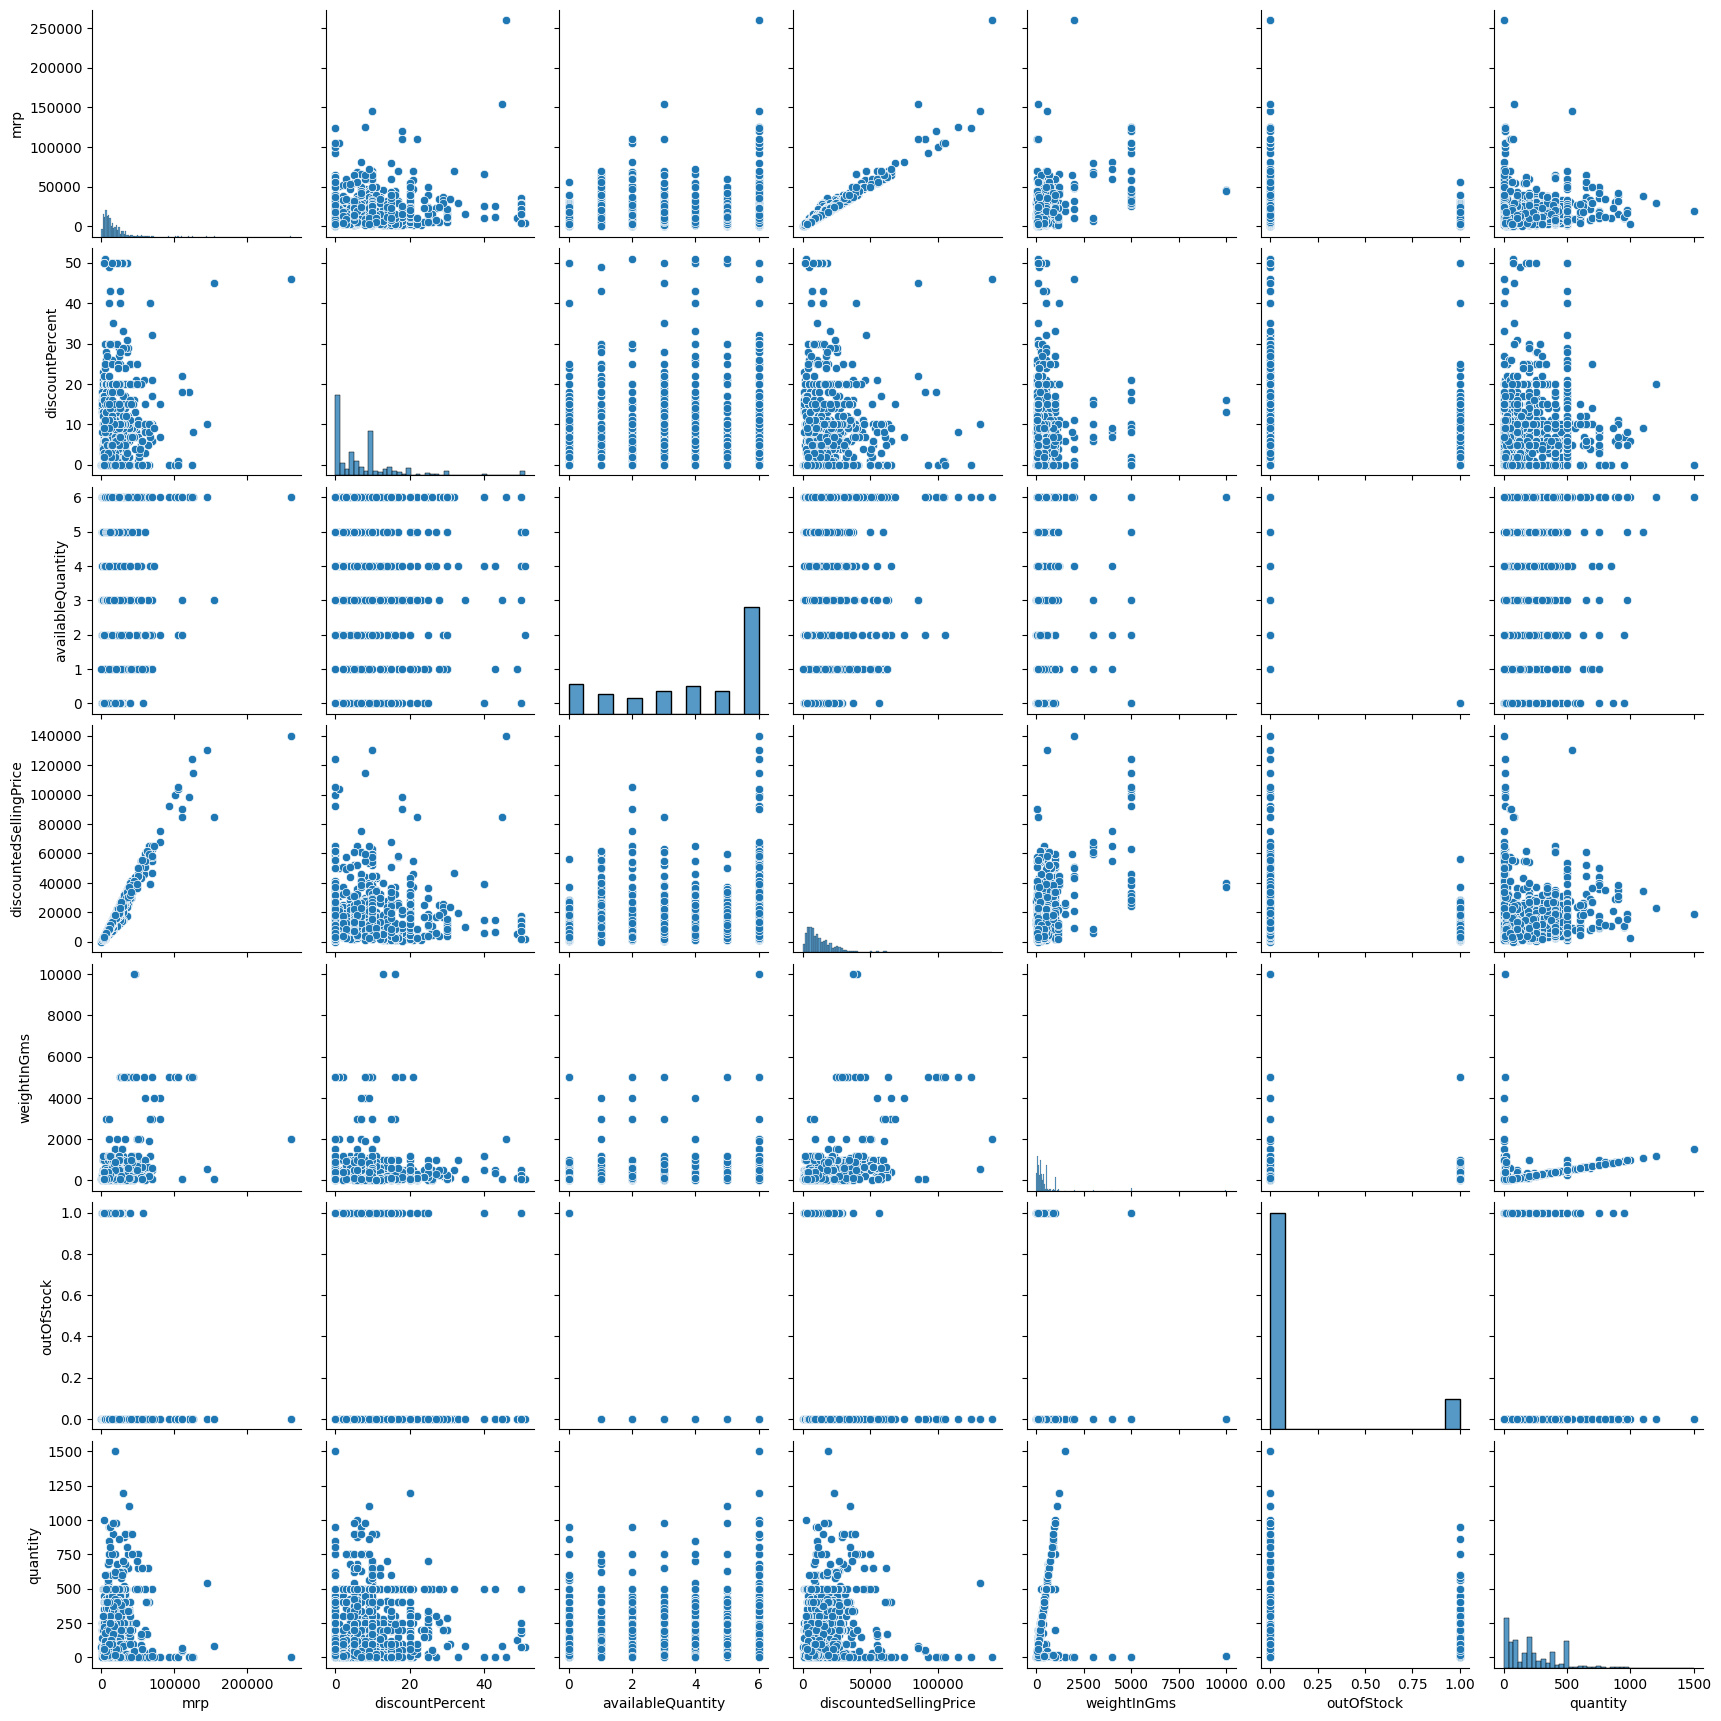

In [25]:
sns.pairplot(df)

Strong Correlation Between MRP and Discounted Selling Price There is a clear linear relationship between mrp and discountedSellingPrice.

There’s a slight trend suggesting that higher MRP products may receive higher discounts.


<Axes: >

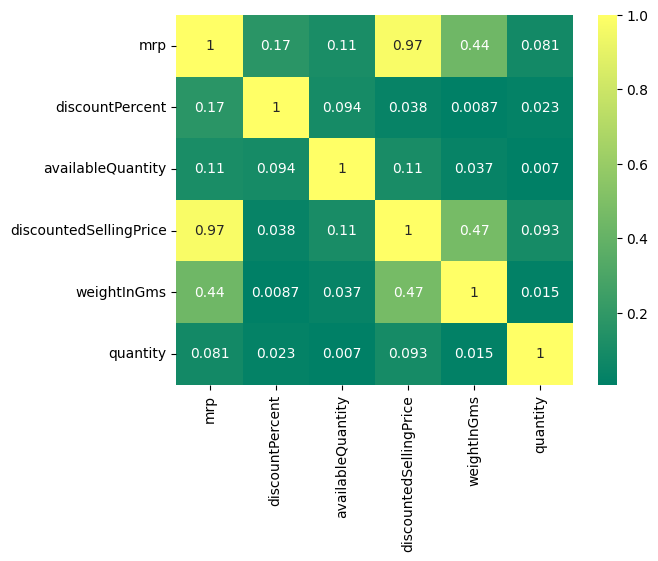

In [26]:
sns.heatmap(df[[col for col in df.columns if col not in cat_col and df[col].dtype!='bool']].corr(),annot=True,cmap='summer')

mrp and weightingms has correlation of 0.44

discountedsellingprice weightingms has correlation of 0.47

but not strong relation

Average discount provided on each category

In [32]:
avg_dis=df.groupby('Category')['discountPercent'].mean().sort_values(ascending=False)

In [33]:
avg_dis.head()

Category
Fruits & Vegetables     15.462366
Meats, Fish & Eggs      11.031746
Chocolates & Candies     8.324742
Ice Cream & Desserts     8.324742
Packaged Food            8.324742
Name: discountPercent, dtype: float64

C:\Users\madhu\AppData\Local\Temp\ipykernel_20708\3973922563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_dis.values,y=avg_dis.index,palette='viridis')


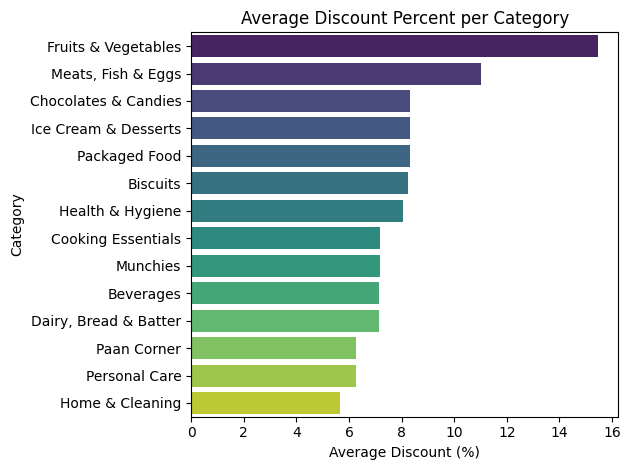

In [34]:
sns.barplot(x=avg_dis.values,y=avg_dis.index,palette='viridis')
plt.title('Average Discount Percent per Category')
plt.xlabel('Average Discount (%)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Average price per category

In [35]:
avg_price=df.groupby('Category')['mrp'].mean().sort_values(ascending=False)

C:\Users\madhu\AppData\Local\Temp\ipykernel_20708\1892557317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values,y=avg_price.index,palette='viridis')


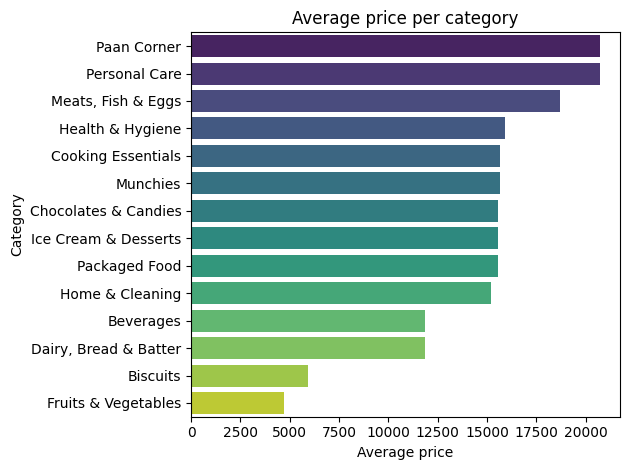

In [36]:
sns.barplot(x=avg_price.values,y=avg_price.index,palette='viridis')
plt.title('Average price per category')
plt.xlabel('Average price')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Average selling price per category after discount

C:\Users\madhu\AppData\Local\Temp\ipykernel_20708\2614544119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sellingprice.values,y=avg_sellingprice.index,palette='viridis')


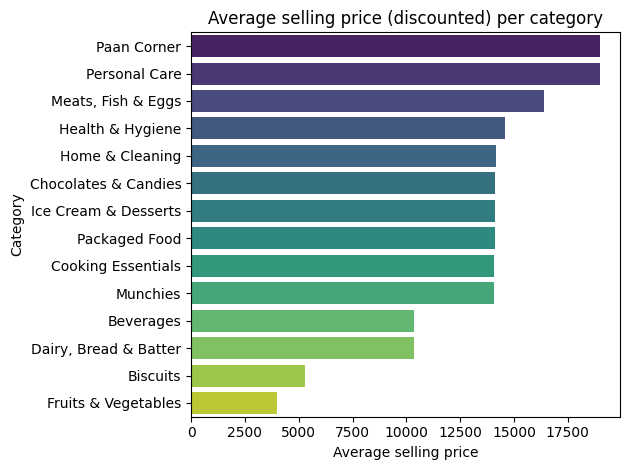

In [38]:
avg_sellingprice=df.groupby('Category')['discountedSellingPrice'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sellingprice.values,y=avg_sellingprice.index,palette='viridis')
plt.title('Average selling price (discounted) per category')
plt.xlabel('Average selling price')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Average decrease in price after discount per category

C:\Users\madhu\AppData\Local\Temp\ipykernel_20708\1193698989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_change.values,y=avg_change.index,palette='magma')


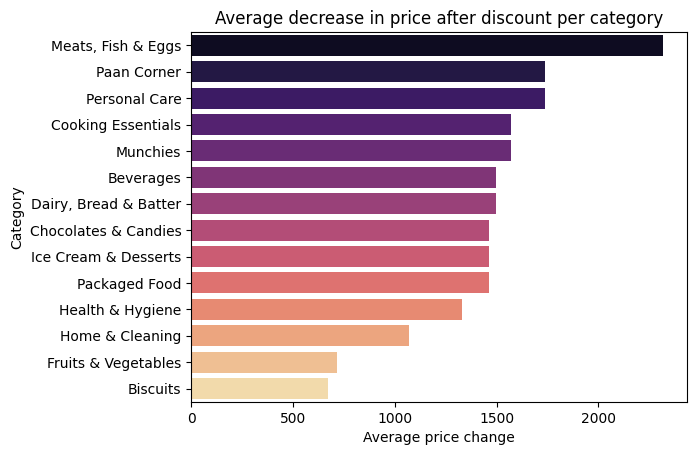

In [39]:
avg_change=df.groupby('Category')['mrp'].mean().sort_values(ascending=False) - df.groupby('Category')['discountedSellingPrice'].mean().sort_values(ascending=False)
avg_change=avg_change.sort_values(ascending=False)
sns.barplot(x=avg_change.values,y=avg_change.index,palette='magma')
plt.title('Average decrease in price after discount per category')
plt.xlabel('Average price change')
plt.ylabel('Category')
plt.show()

Find out which are best features for deciding a product is outofstock of not

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [54]:
rf=RandomForestClassifier()
X=df[[col for col in df.columns if col!='outOfStock' and df[col].dtype!='object']]
y=df['outOfStock']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
imp=rf.feature_importances_ #help understand which feature is more useful
#more the value more that specific feature contributed to solving errors 
#while prediction

In [57]:
imp

array([0.01882726, 0.0121459 , 0.9308468 , 0.01933662, 0.01076082,
       0.0080826 ])

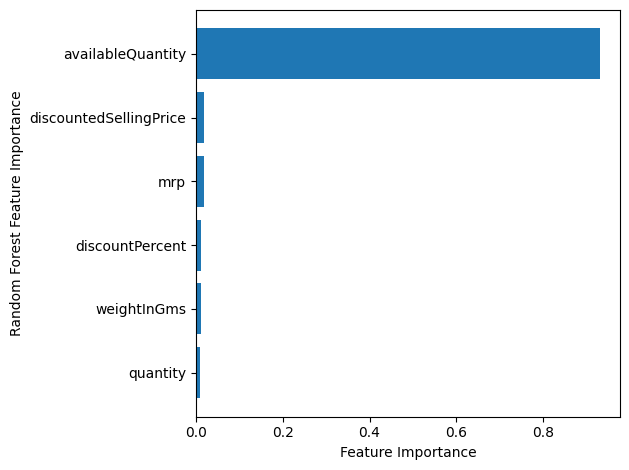

In [58]:
feature_name=X_train.columns
feature_imp_df=pd.DataFrame({
    'Feature':feature_name,
    'Importance':imp
}).sort_values(by='Importance',ascending=False)
plt.barh(feature_imp_df['Feature'],feature_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The quantity would decide if the product is outofstock or not and contributes more

In [59]:
pred=rf.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
print(accuracy_score(y_test,pred))

1.0


In [62]:
print(confusion_matrix(y_test,pred))

[[648   0]
 [  0  99]]
